In [1]:
import pandas as pd


df = pd.read_csv(r'D:\ML\Assign6\Naive-Bayes.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


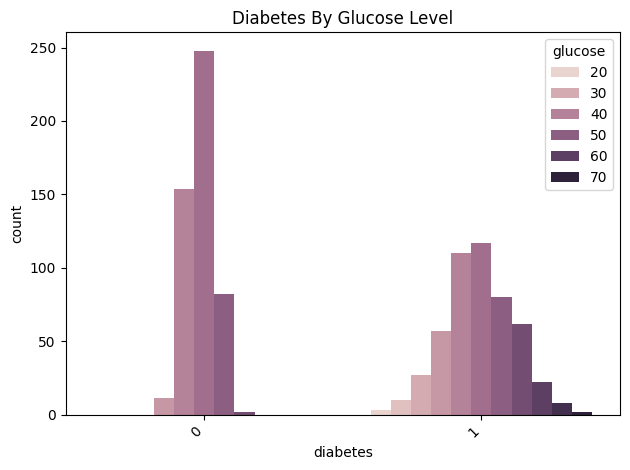

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='diabetes',hue='glucose')
plt.xticks(rotation=45, ha='right');
plt.title('Diabetes By Glucose Level')
plt.tight_layout()
plt.show()

In [6]:
pre_df = pd.get_dummies(df,columns=['bloodpressure'],drop_first=True)
pre_df.head()

,glucose,diabetes,bloodpressure_52,bloodpressure_57,bloodpressure_58,bloodpressure_60,bloodpressure_62,bloodpressure_63,bloodpressure_65,bloodpressure_67,...,bloodpressure_85,bloodpressure_87,bloodpressure_88,bloodpressure_90,bloodpressure_92,bloodpressure_93,bloodpressure_95,bloodpressure_97,bloodpressure_98,bloodpressure_100
0,40,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,40,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,45,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('glucose', axis=1)
y = pre_df['glucose']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [10]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.0425531914893617
F1 Score: 0.04846624611247009


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [18]:
y_pred = model.predict(X_test)


In [20]:
print("Unique values in y_test:", y_test.unique())
print("Type of y_test:", type(y_test.iloc[0]))


Unique values in y_test: [65 40 30 45 50 25 55 35 60 20]
Type of y_test: <class 'numpy.int64'>


In [21]:
print("Unique values in y_pred:", pd.Series(y_pred).unique())


Unique values in y_pred: [70 60 20 35 25 50 30 65 55 45]


In [22]:
labels = ['Fully Paid', 'Not fully Paid']


In [23]:
labels = sorted(set(y_test))  # dynamically gets the correct labels


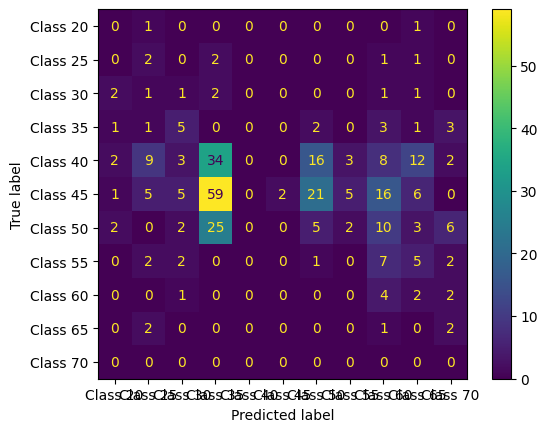

In [26]:
labels = sorted(list(set(y_test) | set(y_pred)))  # union of true & pred labels
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Optional: build display labels if you want to name the classes nicely
display_labels = [f"Class {label}" for label in labels]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.show()
